# Light curve in single lens microlensing events

In the case of a galactic microlensing event prouduced by a single lens, the Einstein radius is
$$
\theta_E\approx 1 mas \left(\frac{M}{M_\odot}\right)^{1/2}\left(\frac{D}{10 \mathrm{kpc}}\right)^{-1/2} \;.
$$
Since this is the scale of separation between the images in the microlensing event, we may conclude that the effect is not appreciable.

However, if the source moves with some transverse velocity $v$ or relative motion
$$
\mu_{rel}=\frac{v}{D_L} \;,
$$
then, during the microlensing event, the magnification of the source changes as
$$
\mu(t)=\frac{y^2(t)+2}{y(t)\sqrt{y^2(t)+4}}
$$
with 
$$
y(t)=\sqrt{y_0^2+\left(\frac{t-t_0}{t_E}\right)^2} \;.
$$

In the following, we will compute amplitude of the effect, to understand if it is measurable.

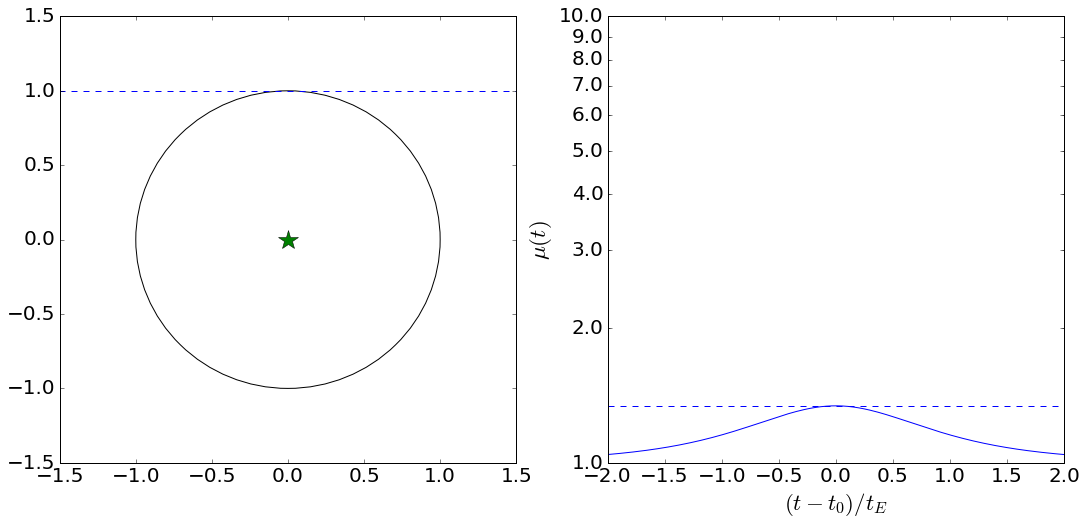

In [2]:
# import the usual stuff

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker

%matplotlib inline

# our problem can be phrased as this: given a lens with a given mass M and placed 
# at a given distance D_L, we want to compute the magnification of a source moving a velocity 
# v on a plane at distance D_S, knowing that the source passes at a minimal distance y0 from
# the lens at the time t0. 

def mut_func(M,DL,DS,v,y0,t0,t):
    y=yt(M,DL,DS,v,y0,t0,t)
    return ((y**2+2)/y/np.sqrt(y**2+4))

def yt(M,DL,DS,v,y0,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return (np.sqrt(y0**2+((t-t0)/tE)**2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)


t=np.linspace(0,730,1600)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=1.0
t0=365.0 # days

mut=mut_func(M_lens,DL,DS,vel,y0,t0,t)

theta_einst=theta_e_func(M_lens,DL,DS)
t_einst=EinsteinCrossTime(M_lens,DL,DS,vel)


fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[1].plot((t-t0)/t_einst,mut,'-')

xx=[-2,2]
yy=[y0,y0]

ax[0].plot(xx,yy,'--')

ax[1].set_ylim([1.0,10.0])
ax[1].set_xlim([-2,2])
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$(t-t_0)/t_E$',fontsize=23)
ax[1].set_ylabel(r'$\mu(t)$',fontsize=23)
ax[1].set_yticks(np.arange(1, 11, 1.0))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

circle=plt.Circle((0,0),1,color='black',fill=False)
ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,1.5])
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

xa=[-2,2]
ya=[1.34,1.34]
ax[1].plot(xa,ya,'--',color='blue')

Thus, we find that when the source is distant $\theta_E$ from the lens, then the magnification is $\mu=1.34$. When it is farther away, the magnification is smaller...

When the source gets even closer, the magnification is much larger:

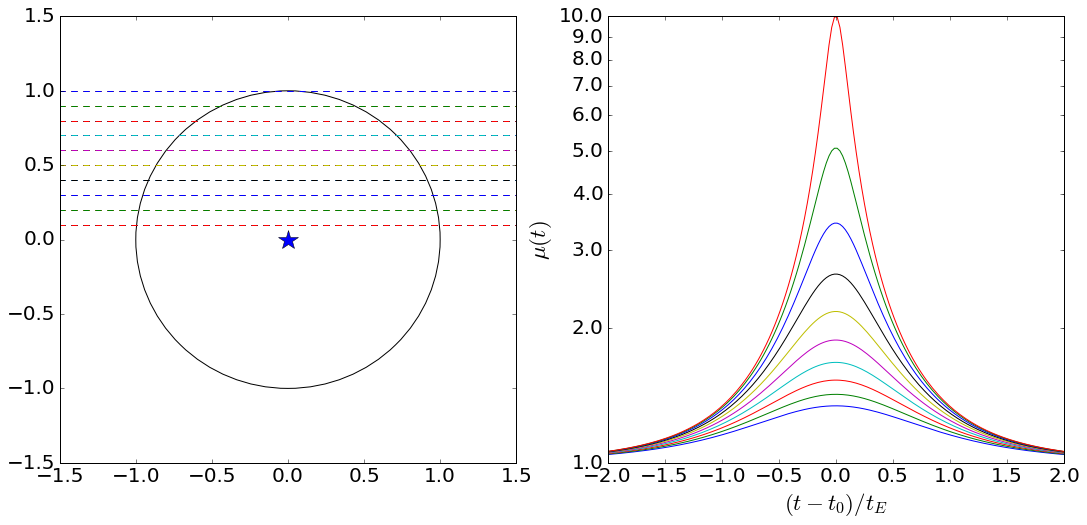

In [3]:
y0=np.linspace(1.0,0.1,10)

fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[1].set_ylim([1.0,10.0])
ax[1].set_xlim([-2,2])
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$(t-t_0)/t_E$',fontsize=23)
ax[1].set_ylabel(r'$\mu(t)$',fontsize=23)
ax[1].set_yticks(np.arange(1, 11, 1.0))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

circle=plt.Circle((0,0),1,color='black',fill=False)
ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,1.5])
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

for i in range(y0.size):
    mut=mut_func(M_lens,DL,DS,vel,y0[i],t0,t)
    ax[1].plot((t-t0)/t_einst,mut,'-')
    yy=[y0,y0]
    ax[0].plot(xx,yy,'--')


What is the time scale of the event?

$$
t_E=\frac{\theta_E D_L}{v}=\frac{\theta_E}{\mu_{rel}}
$$

The exact value of the Einstein cross time depends on the mass of the lens, on the distances $D_L$ and $D_S$ and on the transverse velocity of the lens, $v$. Assuming that the sources are in the bulge of the galaxy, the lenses at around half that distance, and that the relative transverse velocity is of the order of $\sim 200$ km/s, the Einstein crossing time is given as a function of the lens mass in the figure below:

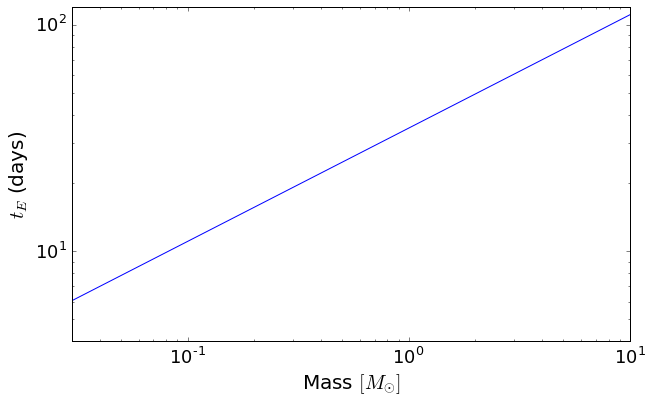

In [4]:
M=10**np.linspace(-2.1,1.0,100)
tE=EinsteinCrossTime(M,DL,DS,vel)

fig,ax=plt.subplots(1,1,figsize=(10,6))
ax.plot(M,tE,'-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([3e-2,10])
ax.set_ylim([4,120])
ax.set_xlabel('Mass $[M_{\odot}]$',fontsize=20)
ax.set_ylabel('$t_{E}$ (days)',fontsize=20)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)



Thus, these microlensing events last from few days to few months. In order to detect them, light curves must be monitored with the appropriate cadence.

How frequently can these events be detected?